<a href="https://colab.research.google.com/github/omid-sar/Interview-Preparation/blob/main/ML_interview/ML_int_twitter_toxic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/omid-sar/Project_Data_Hub/main/twitter_toxic_final_balanced_dataset.csv

--2024-05-10 14:02:47--  https://raw.githubusercontent.com/omid-sar/Project_Data_Hub/main/twitter_toxic_final_balanced_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5518854 (5.3M) [text/plain]
Saving to: ‘twitter_toxic_final_balanced_dataset.csv’

twitter_toxic_final 100%[===================>]   5.26M  --.-KB/s    in 0.06s   

2024-05-10 14:02:47 (94.9 MB/s) - ‘twitter_toxic_final_balanced_dataset.csv’ saved [5518854/5518854]



In [3]:
import pandas as pd
df_org = pd.read_csv("twitter_toxic_final_balanced_dataset.csv", usecols=["Toxicity", "tweet"])
df_org.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [4]:
for _ in range(10):
  rand = np.random.randint(len(df_org))
  print(df_org.iloc[rand]["tweet"], df_org.iloc[rand]["Toxicity"])

awwð   bday maj ð  0
RT @iCumNpeace: Niggas talk more than bitches these days... 1
early doors but ready to be immersed in all that is #smaccdub   @ the convention centreâ¦  0
RT @IGGYAZALEA: its like the guy that asks for your number and then says you ugly and a bitch when you say no&#8230; 1
always okay to bring your ho to the barbershop though, they usually cool af 1
&#8220;@LoveLifeEst13: lmao @West305 &amp; Aero sound young af talking bout hoes n weed n shit&#8221; @Finesse_iAm brah you gotta listen to this shit 1
You at the club EVERY week bitch get a life 1
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   0
..........does nobody sell #orange flavored and colored #bubblegum? IS THAT YOUR FUCKIN' PROBLEM? #Giants? Fuck it. I'm going #6Pack now 1
when you order a margarita and it's pink, drink it before anyone see you drinking it.  â¦  0


MAX LENGTH: 52


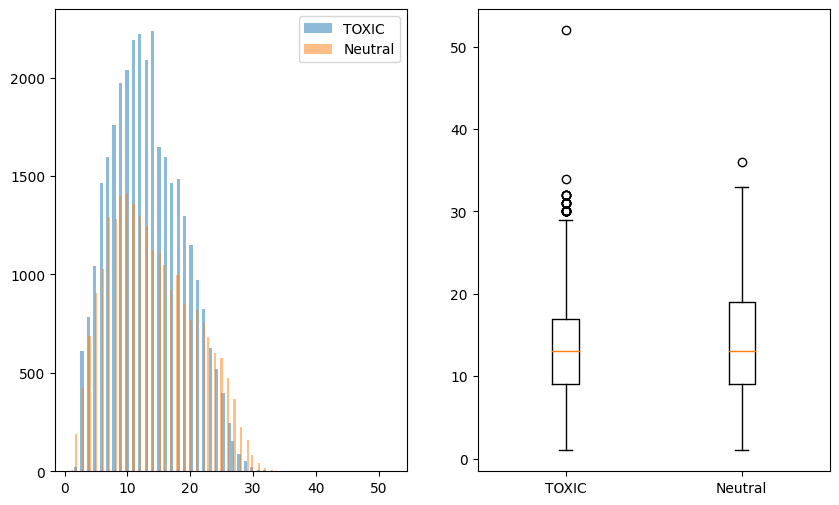

In [5]:
import matplotlib.pyplot as plt

df = df_org.copy()

df["tweet_len"] = [len(seq.split()) for seq in df_org["tweet"]]
toxic_len = df[df["Toxicity"] == 0]["tweet_len"]
norm_len = df[df["Toxicity"] == 1]["tweet_len"]

print("MAX LENGTH:" ,max(df["tweet_len"]))

fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.hist(toxic_len, bins=100, alpha=0.5, label="TOXIC")
ax1.hist(norm_len, bins=100, alpha=0.5, label="Neutral")
ax1.legend()

ax2.boxplot([toxic_len, norm_len], labels=["TOXIC", "Neutral"])
plt.show()


In [6]:
X = df["tweet"].values
y = df["Toxicity"].values
sequences = [sequence for sequence in X]

In [7]:
from transformers import DistilBertTokenizer, BertTokenizer

#distilled_tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [8]:
MAX_LEN = 32

model_inputs = tokenizer(sequences, padding=True, truncation=True, max_length=MAX_LEN ,return_tensors='pt')
model_inputs

{'input_ids': tensor([[  101,  1030,  5310,  ...,     0,     0,     0],
        [  101,  1030,  5310,  ...,  1001,  4487,   102],
        [  101, 12170, 14945,  ...,     0,     0,     0],
        ...,
        [  101,  2402, 10131,  ...,     0,     0,     0],
        [  101,  2017,  2226,  ...,     0,     0,     0],
        [  101,  1066,  1066,  ...,  8299,  1024,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [9]:
print("tweet: \n " , sequences[0],
      "\n input_ids: \n",  model_inputs.input_ids[0],
      "\n token_type_ids: \n" , model_inputs.token_type_ids[0],
      "\n attention_mask: \n" , model_inputs.attention_mask[0])

tweet: 
   @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 
 input_ids: 
 tensor([  101,  1030,  5310,  2043,  1037,  2269,  2003, 28466,  2389,  1998,
         2003,  2061, 14337,  2002,  8011,  2015,  2010,  4268,  2046,  2010,
        28466,  1012,  1001,  2448,   102,     0,     0,     0,     0,     0,
            0,     0]) 
 token_type_ids: 
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]) 
 attention_mask: 
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0])


In [10]:
import torch
from torch.utils.data import DataLoader, TensorDataset

BATCH_SIZE = 16
NUM_WORKERS = 2
labels = torch.tensor(y)
dataset = TensorDataset(model_inputs["input_ids"], model_inputs["attention_mask"], labels)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS , pin_memory=True)


In [14]:
from torch.utils.data import random_split

train_size = int(len(dataset)* 0.7)
val_size = int(len(dataset)* 0.2)
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [15]:
import torch.nn as nn


class LSTM(nn.Module):

  def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers=1, num_classes=2,
               bidirectional=True, f_c_layers=[128,256]):
    super(LSTM, self).__init__()

    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.bidirectional = bidirectional
    self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
    self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                        batch_first=True, bidirectional=bidirectional)

    # The input size for the first fully connected layer
    fc_input_size = 2 * hidden_size if bidirectional==True else hidden_size

    self.fc1 = nn.Linear(fc_input_size, f_c_layers[0])
    self.fc2 = nn.Linear(f_c_layers[0], f_c_layers[1])
    self.fc3 = nn.Linear(f_c_layers[1], num_classes)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.embedding(x)

    # Initialize hidden and cell states
    h0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), x.size(0), self.hidden_size).to(x.device)
    c0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), x.size(0), self.hidden_size).to(x.device)

    out, _ = self.lstm(x, (h0, c0))

    # Take the output from the last time step (batch_size, seq_length, num_directions * hidden_size)
    out = out[:, -1, :]

    out = self.relu(self.fc1(out))
    out = self.relu(self.fc2(out))
    out = self.sigmoid(self.fc3(out))

    return out

In [16]:
VOCAB_SIZE = tokenizer.vocab_size
EMBEDDING_DIM = 50
HIDDEN_SIZE = 128
FC1_SIZE = 256
FC2_SIZE = 128

model = LSTM(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_SIZE, bidirectional=True)
print(model)

LSTM(
  (embedding): Embedding(30522, 50)
  (lstm): LSTM(50, 128, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [26]:
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.0001)

#Trainig Loop
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
  for batch in dataloader:


In [22]:

model.parameters()

<generator object Module.parameters at 0x7982fd168350>